<a href="https://colab.research.google.com/github/NishantSutar/myprojects/blob/main/Uber_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data of Uber drives in 2016

## Features of the data
Start date, End date, Total distance, Category, Purpose, Start location, End location

## Import required libraries

In [15]:
import numpy as np # For numerical calculations
import pandas as pd # Data cleaning etc.
import matplotlib.pyplot as plt # EDA
import seaborn as sns #EDA
import warnings 
warnings.filterwarnings('ignore') # There are unwanted warning coming to ignore them... Not displayed

### Read the data

In [16]:
df=pd.read_csv('/content/My Uber Drives - 2016.csv')

In [17]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [18]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

### Removing the ending * from column name
Obverve that column names have unnecessary * at the end. We want to remove

In [19]:
df=df.rename(columns={'START_DATE*':'START_DATE', 'END_DATE*':'END_DATE', 'CATEGORY*':'CATEGORY', 'START*':'START', 'STOP*':'STOP', 'MILES*':'MILES', 'PURPOSE*':'PURPOSE'})

#another way to do the same
#df.columns=df.columns.str.replace('*','')

In [20]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Remove last Row
Obverbe that the last row of the data is of no use, So we drop it.

In [21]:
df.drop(axis=0,index=1155,inplace=True)

In [22]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


### Finding and dealing with null values

In [23]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

There is null data present in only Purpose column. We see the percentage of the null value.

In [24]:
df.isnull().sum()/df['START'].count()*100

START_DATE     0.000000
END_DATE       0.000000
CATEGORY       0.000000
START          0.000000
STOP           0.000000
MILES          0.000000
PURPOSE       43.463203
dtype: float64

Nearly 43.5% data is missing in Purpose column. We need to decide to drop the data or to fill with some values. Since we have just 7 features droping this data will cause a large loss in the data. So we avoid dropping the data.

In [25]:
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [26]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

So there are no null values in the data now. Since most of data is of object type we wont get much insight from descriptive statistics.

In [27]:
df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


Obverve that mean is 10.57 and even 75 percentile is 10.4 but the maximum is 310.3 hence there are some outliers on higher sides. We see them from boxplot


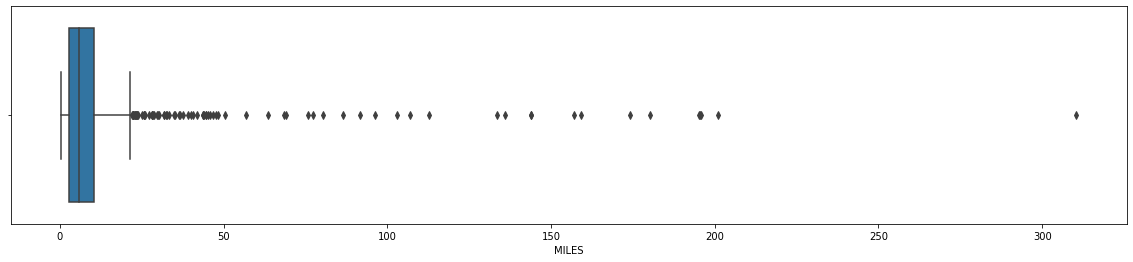

In [28]:
plt.figure(figsize=(20,4))
sns.boxplot(x='MILES',data=df)
plt.show()

So there are many outliers on the higher side.

### Change the date and time to datetime datatype

In [29]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')

In [30]:
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


### Frequency of start and end location

In [32]:
start=df.groupby(['START'])['MILES'].count()

In [33]:
start

START
Agnew               4
Almond              1
Apex               17
Arabi               1
Arlington           1
                   ..
West University     2
Weston              2
Westpark Place     17
Whitebridge        68
Winston Salem       1
Name: MILES, Length: 177, dtype: int64

In [34]:
start.values

array([  4,   1,  17,   1,   1,   1,   2,   1,   8,   1,  16,   2,   1,
         5,   1,   4,   2, 201,   8,   1,   2,   2,   1,   8,   1,   1,
         1,   1,   1,   2,   6,   1,   1,   9,  37,   1,   1,   1,   2,
         1,   1,   8,   1,   1,   1,  10,   1,   2,   3,   1,   1,   1,
         5,   1,   2,   1,   1,   1,   1,   7,   1,   2,   2,   5,   2,
         3,   1,  57,   1,   2,   2,   1,   2,   3,  27,   4,   2,   1,
         1,  11,   2,  11,   1,  36,   2,   1,   1,   1,   2,   1,   1,
         1,   2,   1,   1,   1,   1,   3,   1,   3,   4,  14,   1,  85,
         1,   1,  10,   4,   2,   2,   5,   1,   1,   3,   1,   7,   2,
         8,   2,   5,   1,   1,   2,   3,   6,  11,  28,   5,   1,   1,
         2,   1,   1,   2,   8,   2,   1,   1,   4,   1,   1,   5,   1,
         1,   2,   1,   5,   4,   1,   1,   2,   1,   1,   1,   1,   4,
         1,   7,   2,   1,   1,   1, 148,   1,   1,   1,   1,   4,   4,
         5,   1,   2,   2,   2,  17,  68,   1])

Obverse that for many locations cabs are booked for once very less number of times. Such locations are not that profitable. We will consider the locations having larger frequency.

In [35]:
start=df['START'].value_counts()

In [36]:
start[start>10]

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64

In [37]:
end=df['STOP'].value_counts()

In [38]:
end[end>10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64

Obverse that in the location Cary there are more number of bookings so we can increase the fare a bit higher in this location. The locations in which there are not much booking we can give some discount code to the customers.

### Make pie chart and count plot
 Make pie chart and count plot to see comparison between the number of bookings in various locations.

([<matplotlib.patches.Wedge at 0x7f2e22cb21c0>,
 [Text(0.7620783039532385, 0.7932443877165194, 'Cary'),
  Text(-0.6508354949994071, 0.8867993901942406, 'Unknown Location'),
  Text(-1.0999911685017374, 0.004407858684526366, 'Morrisville'),
  Text(-0.9021894860690977, -0.629328317515093, 'Whitebridge'),
  Text(-0.4891513295996894, -0.9852568075130749, 'Islamabad'),
  Text(-0.0924555590962785, -1.0961076450751517, 'Durham'),
  Text(0.22755300862031866, -1.0762061272209156, 'Lahore'),
  Text(0.4930954800496088, -0.9832887915331111, 'Raleigh'),
  Text(0.696127577981733, -0.8517079283259529, 'Kar?chi'),
  Text(0.8347265616483598, -0.716401819706446, 'Westpark Place'),
  Text(0.924294158120493, -0.5963893939904779, 'Apex'),
  Text(0.9948588862365298, -0.46931417672622194, 'Berkeley'),
  Text(1.0439613321016037, -0.34661900853335376, 'Midtown'),
  Text(1.0733929366698811, -0.2404737064778784, 'Kenner'),
  Text(1.0903965993510982, -0.14503536163143374, 'Kissimmee'),
  Text(1.0989315731946385, -

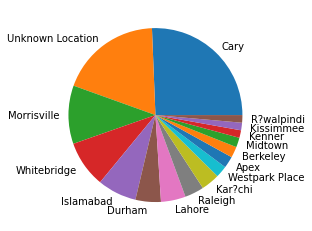

In [39]:
plt.pie(start[start>10],labels=list(start[start>10].index))

([<matplotlib.patches.Wedge at 0x7f2e227c9d00>,
 [Text(0.7446625257740933, 0.8096157870914746, 'Cary'),
  Text(-0.700751911403228, 0.8479072818797599, 'Unknown Location'),
  Text(-1.0973619780885884, -0.07613599047428647, 'Morrisville'),
  Text(-0.8578144473755961, -0.6885886826500279, 'Whitebridge'),
  Text(-0.42146928848322807, -1.0160529705017556, 'Islamabad'),
  Text(-0.01120517235608601, -1.099942927661463, 'Durham'),
  Text(0.30736369426315296, -1.0561853811944697, 'Lahore'),
  Text(0.5731233854957919, -0.938898069546339, 'Raleigh'),
  Text(0.7674491300108477, -0.7880493847758484, 'Kar?chi'),
  Text(0.8930695309430929, -0.6422046503265795, 'Apex'),
  Text(0.9711020541577614, -0.5166824947785404, 'Berkeley'),
  Text(1.03003825286656, -0.38603263803933063, 'Westpark Place'),
  Text(1.0683652173300053, -0.261907927332127, 'R?walpindi'),
  Text(1.0894605844833483, -0.15190666495319183, 'Kissimmee'),
  Text(1.098895246056051, -0.049287302577958776, 'Midtown')])

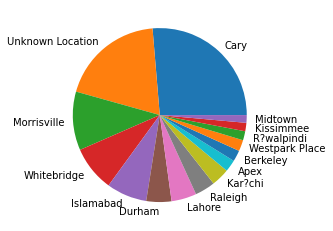

In [40]:
plt.pie(end[end>10],labels=list(end[end>10].index))

In [41]:
ls=list(start[start>10].index)
data=list(start[start>10])

We can clearly see some locations are having very frequent bookings.

In [42]:
start

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

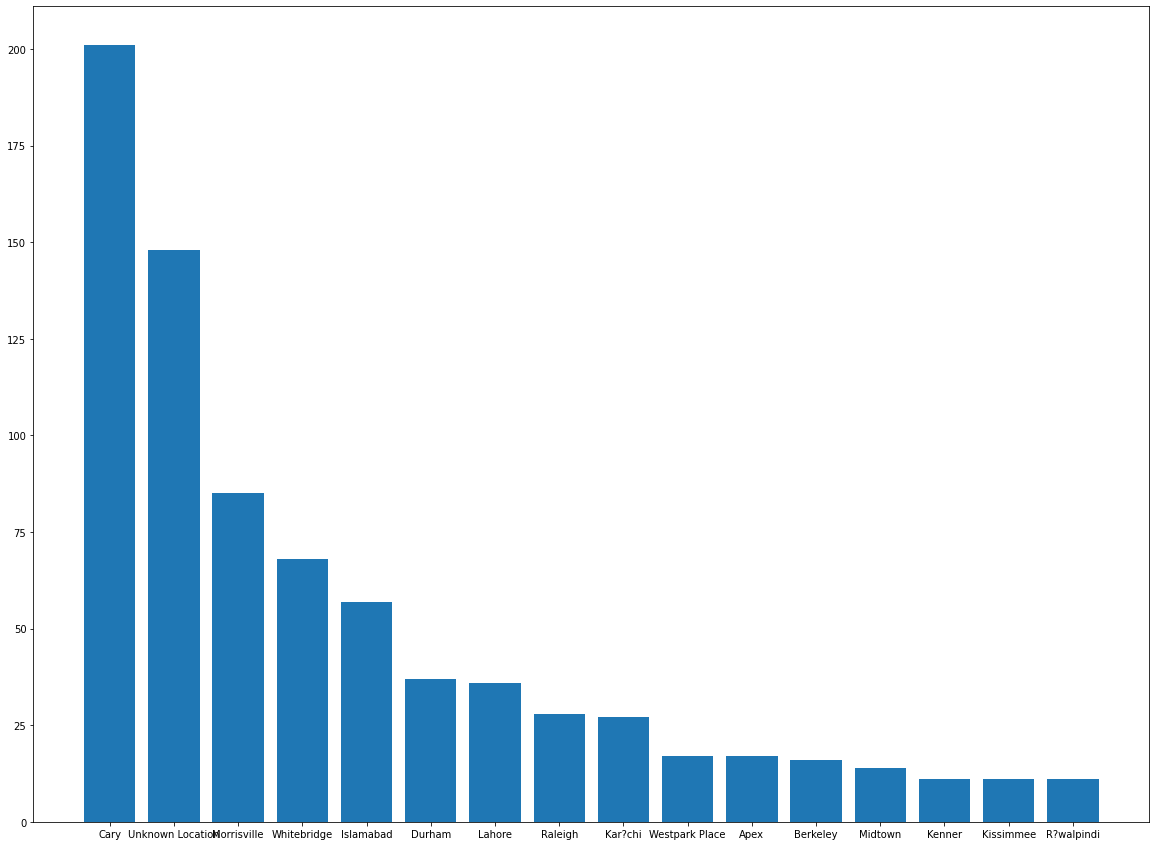

In [43]:
plt.figure(figsize=(20,15))
plt.bar(ls,data)
plt.show()

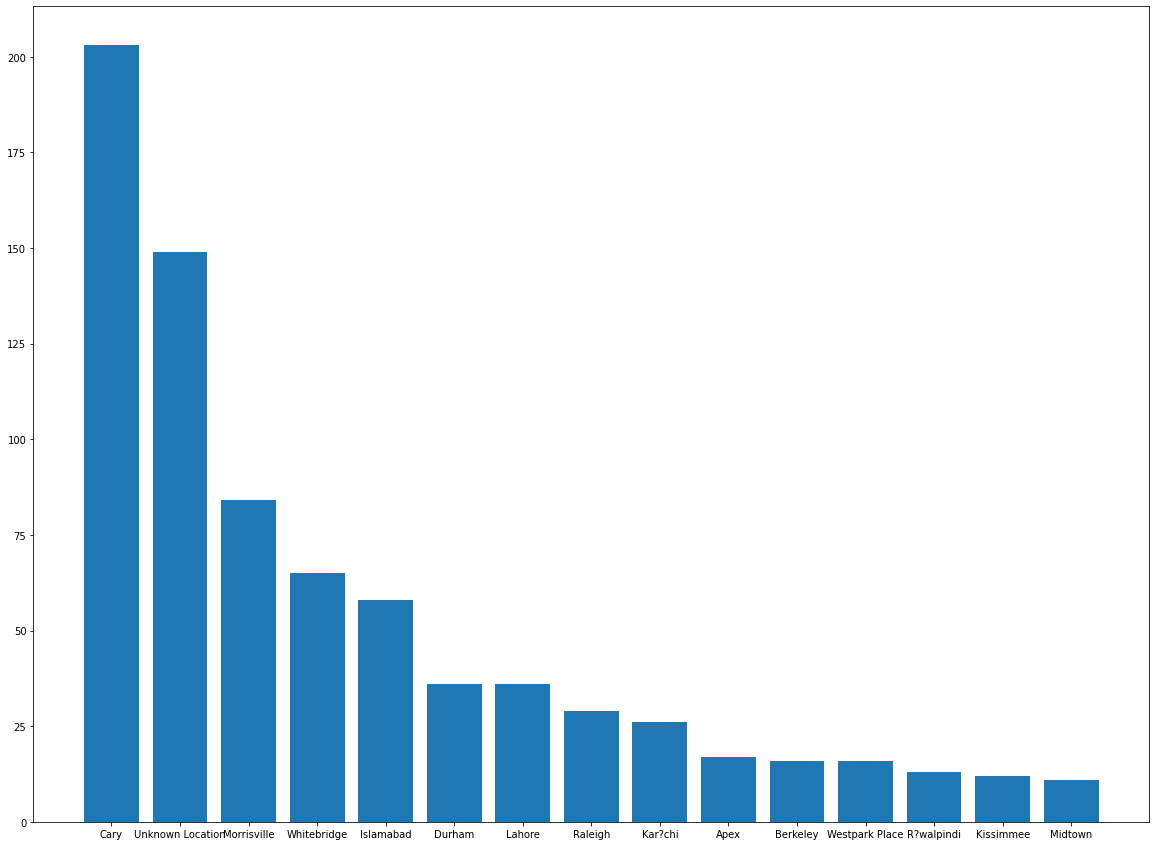

In [44]:
ls=list(end[end>10].index)
data=list(end[end>10])
plt.figure(figsize=(20,15))
plt.bar(ls,data)
plt.show()

## Analysis of Purpose

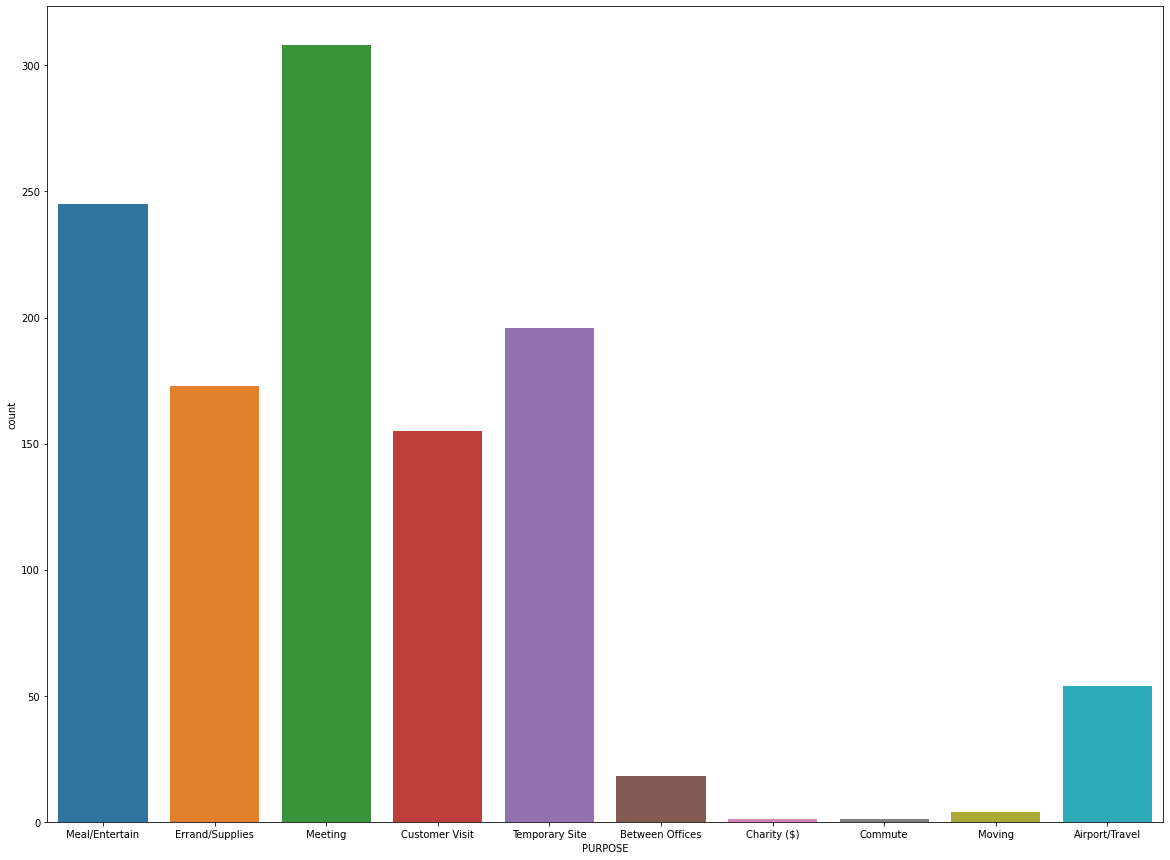

In [45]:
plt.figure(figsize=(20,15))
sns.countplot(data=df,x='PURPOSE')

In [46]:
df['PURPOSE'].value_counts()  

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

More rides are booked for meeting and meal/entertain. We now also see the category of the rides to get more from it.

In [47]:
df['CATEGORY'].value_counts()  

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

Clearly there are more Business trips than personal ones. So we can attract the customers who are booking rides for personal use by giving some offers and discounts. We can also check if there is noticable price difference between uber price and other compitetor's price.

### Analysis of miles column
First we will make categories in the data(Classes and frequency)

In [48]:
print(df['MILES'].max())
print(df['MILES'].min())
df.describe()

310.3
0.5


,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


Observe that 75% of the miles are less than 10.4 we will make classes of size 2.5 miles till 15 miles and a class with miles more than 15 in it.

In [49]:
classes=[x for x in np.arange(2.5,16.0,2.5)]

In [50]:
classes+=[25,50,100,200,311]

In [51]:
classes

[2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 25, 50, 100, 200, 311]

In [52]:
freq=[]
for c in classes:
  freq.append(0)

In [53]:
for mile in df.MILES:
  for i in range(len(classes)):
    if(mile<classes[i]):
      freq[i]+=1
      break

In [54]:
freq


[232, 264, 175, 166, 93, 70, 90, 38, 11, 14, 2]

In [55]:
sum(freq)

1155

(array([1.104e+03, 2.600e+01, 8.000e+00, 4.000e+00, 4.000e+00, 4.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.5 ,  31.48,  62.46,  93.44, 124.42, 155.4 , 186.38, 217.36,
        248.34, 279.32, 310.3 ]),
 <a list of 10 Patch objects>)

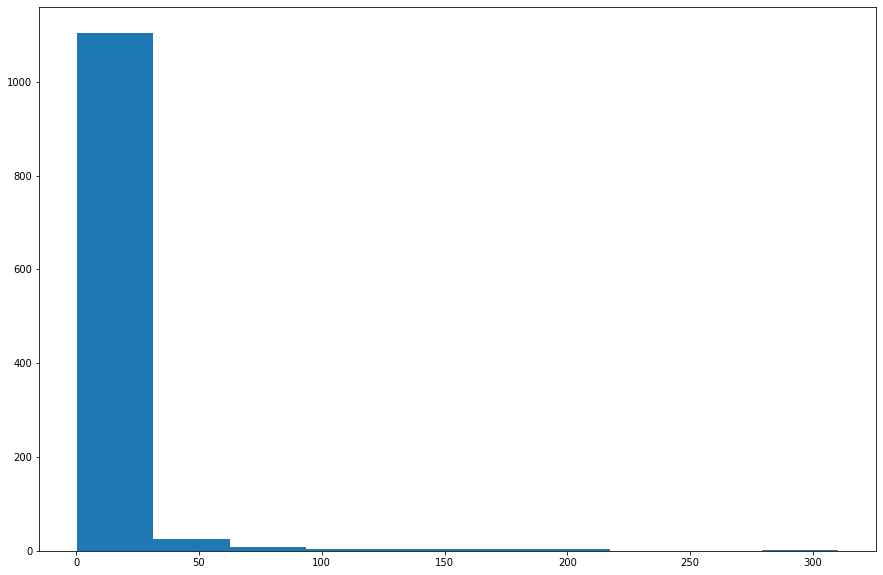

In [56]:
plt.figure(figsize=(15,10))
plt.hist(df['MILES'])

This histogram is not much appealing due to the outliers. We will make a graph with variable limits to get good insights.

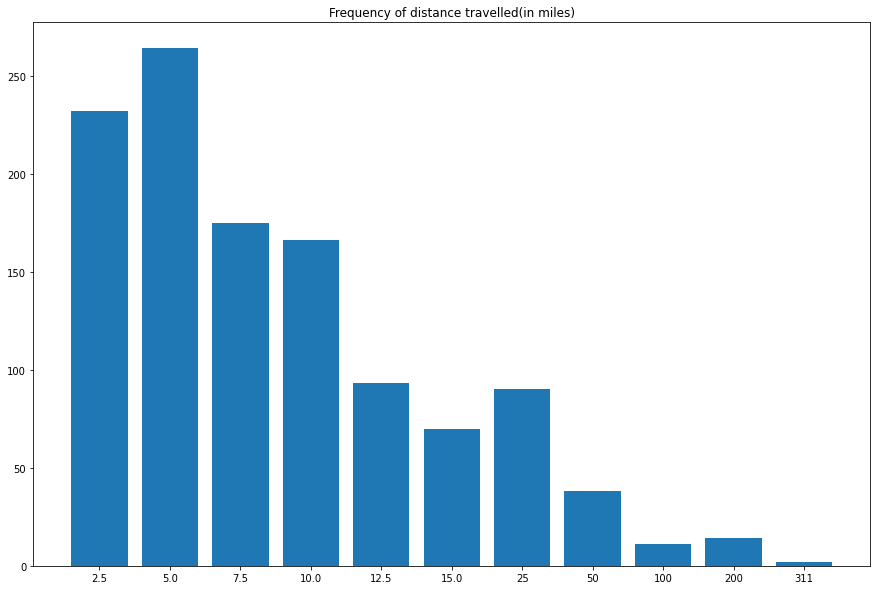

In [57]:
plt.figure(figsize=(15,10))
plt.bar(x=[str(y) for y in classes],height=freq)
plt.title("Frequency of distance travelled(in miles)")
plt.show()

We can see that most of the trips are of the distance 2.5 miles to 5 miles. See can decrease the rate per mile after crossing certain distance.

### Mean miles travelled for each purpose

In [58]:
purpose_mean_dist=df.groupby('PURPOSE')['MILES'].mean()
purpose_mean_dist

PURPOSE
Airport/Travel      14.953704
Between Offices     10.944444
Charity ($)         15.100000
Commute            180.200000
Customer Visit      16.065806
Errand/Supplies      5.928902
Meal/Entertain       5.773878
Meeting             12.652597
Moving               4.550000
Temporary Site      11.016327
Name: MILES, dtype: float64

<BarContainer object of 10 artists>

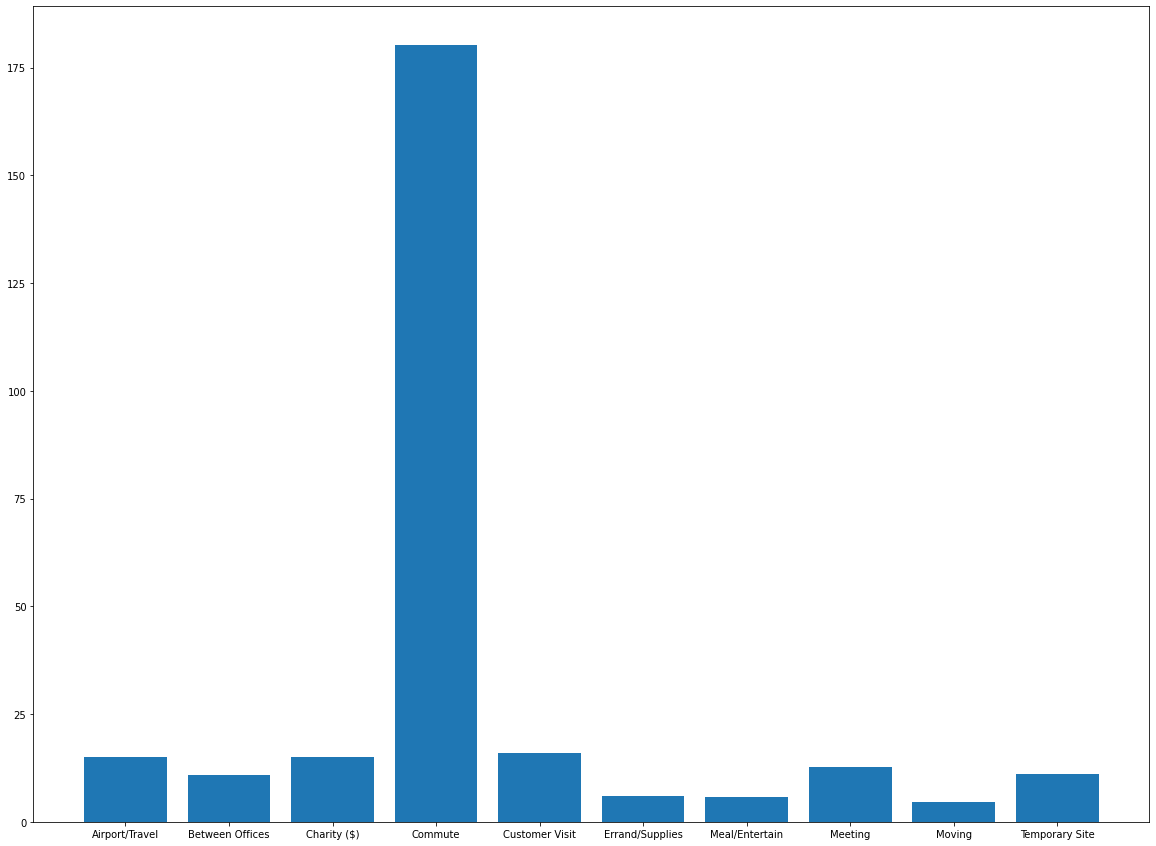

In [59]:
plt.figure(figsize=(20,15))
plt.bar(height=purpose_mean_dist,x=purpose_mean_dist.index)

In [60]:
purpose=df.groupby('PURPOSE').agg({'MILES':['mean',min,max]})

In [61]:
purpose

MILES              
                       mean    min    max
PURPOSE                                  
Airport/Travel    14.953704    0.9  156.9
Between Offices   10.944444    1.9   39.2
Charity ($)       15.100000   15.1   15.1
Commute          180.200000  180.2  180.2
Customer Visit    16.065806    0.6  310.3
Errand/Supplies    5.928902    0.5  195.3
Meal/Entertain     5.773878    0.6   36.5
Meeting           12.652597    0.7  201.0
Moving             4.550000    3.3    6.1
Temporary Site    11.016327    0.7  195.6

### Check for outliers based on purpose

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

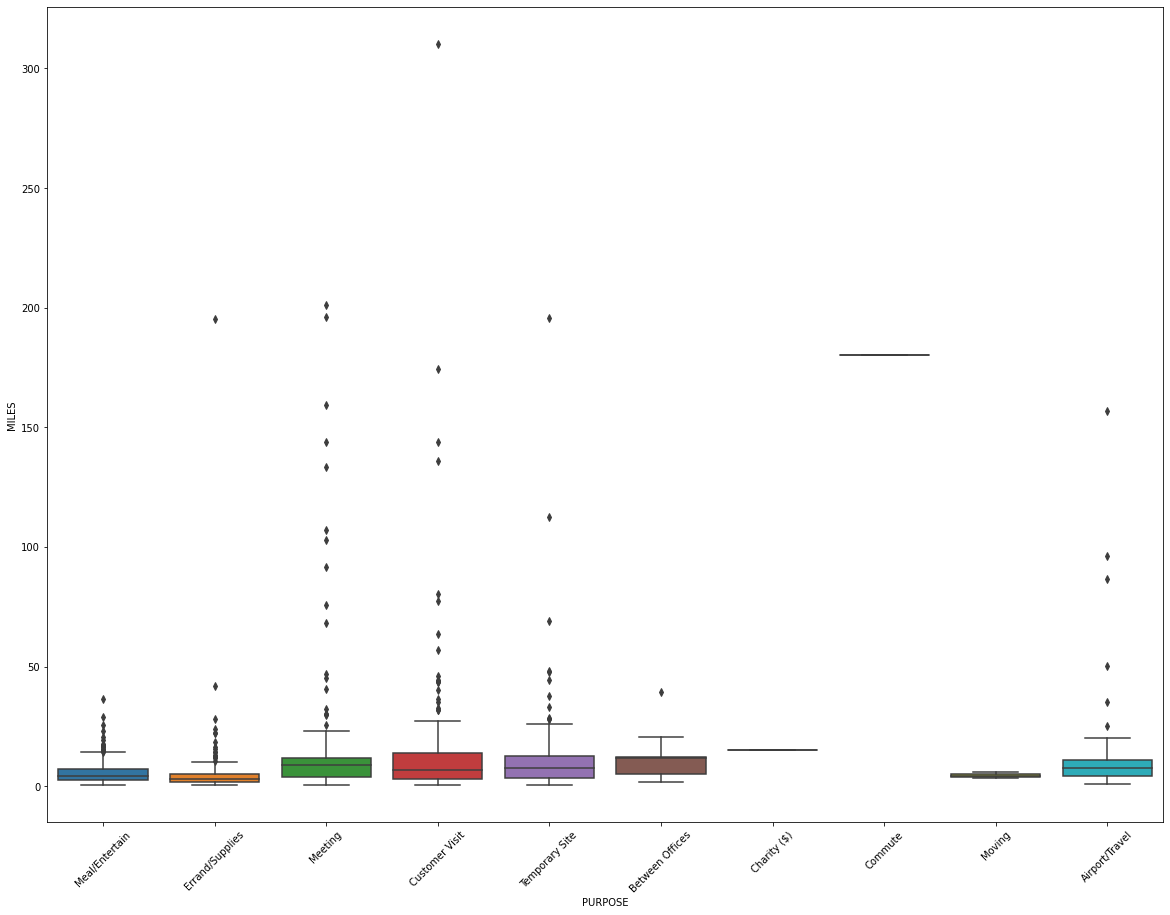

In [62]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df,x=df.PURPOSE,y='MILES')
plt.xticks(rotation = 45)

#### Countplot with order

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

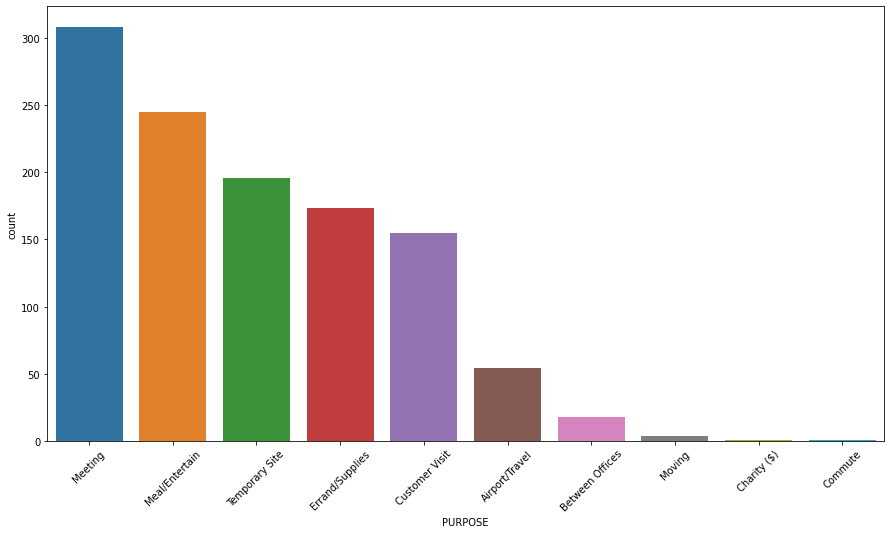

In [63]:
plt.figure(figsize=(15,8))
sns.countplot(df['PURPOSE'],order=df['PURPOSE'].value_counts().index)
plt.xticks(rotation=45)

## Duration of the ride

Create a new column minites in while we save the duration in mins.

In [64]:
df['MINUTES']=df['END_DATE']-df['START_DATE']

In [65]:
df.MINUTES

0      0 days 00:06:00
1      0 days 00:12:00
2      0 days 00:13:00
3      0 days 00:14:00
4      0 days 01:07:00
             ...      
1150   0 days 00:07:00
1151   0 days 00:18:00
1152   0 days 00:35:00
1153   0 days 00:18:00
1154   0 days 01:43:00
Name: MINUTES, Length: 1155, dtype: timedelta64[ns]

Minutes are in datetime for we need to convert into minutes

In [66]:
df['MINUTES']=df['MINUTES'].dt.total_seconds()/60

In [67]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0


In [68]:
df.corr()

,MILES,MINUTES
MILES,1.000000,0.842262
MINUTES,0.842262,1.000000


Observe that miles and minutes have high positive correlation.

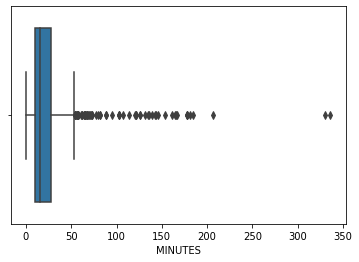

In [69]:
sns.boxplot(df['MINUTES'])

### Compare outliers in miles with outliers in minutes

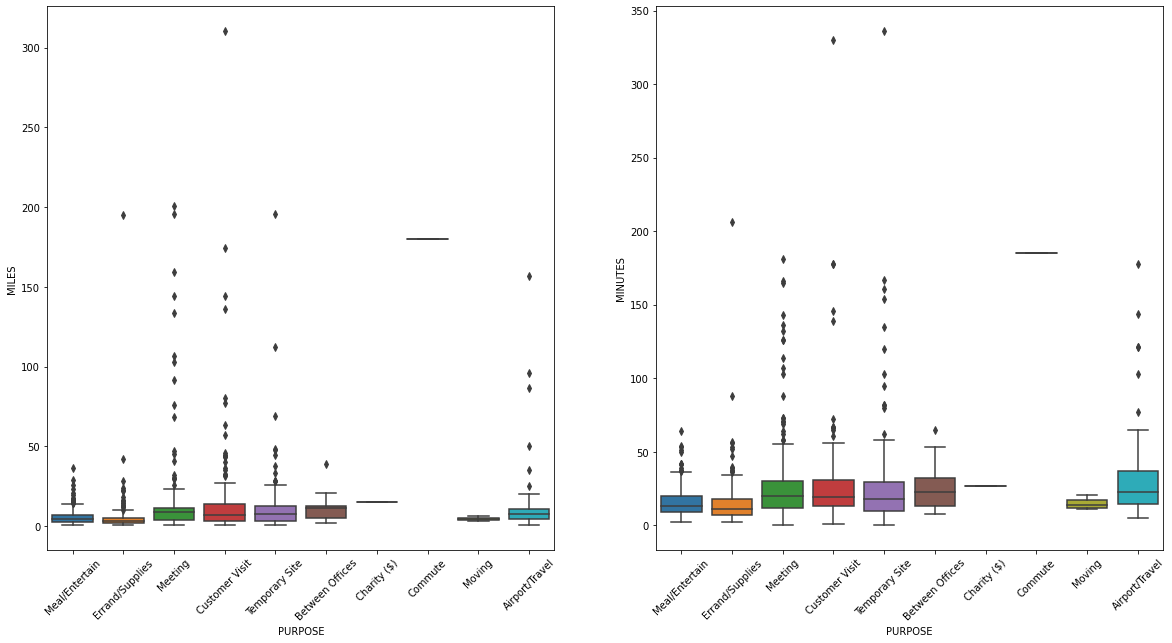

In [103]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='PURPOSE',y='MILES')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data=df,x='PURPOSE',y='MINUTES')
plt.xticks(rotation=45)
plt.show()

We can interpret that outlires in miles and outliers in minutes have relation between them, i.e. outliers in some purpose in miles are also outliers in minutes also.

In [71]:
df['ROUND_TRIP']=(df['START']==df['STOP'])

In [72]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,True
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,True
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,True
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,True
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,False
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,True
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,False
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,True
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,False


#### Percentage of round trip

In [73]:
df['ROUND_TRIP'].sum()/df['ROUND_TRIP'].count()*100

24.935064935064936

### Extracting month information

In [74]:
df['MONTH']=pd.DatetimeIndex(df['START_DATE']).month

In [75]:
 df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,True,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,True,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,True,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,True,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,False,1
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,True,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,False,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,True,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,False,12


Though we got month column but there will be more readability if month is given as name rather than number.

In [76]:
dic={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [77]:
df['MONTH']=df['MONTH'].map(dic)

In [78]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,ROUND_TRIP,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,True,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,True,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,True,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,True,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,False,Jan
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,True,Dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,False,Dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,True,Dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,False,Dec


### Pattern in month

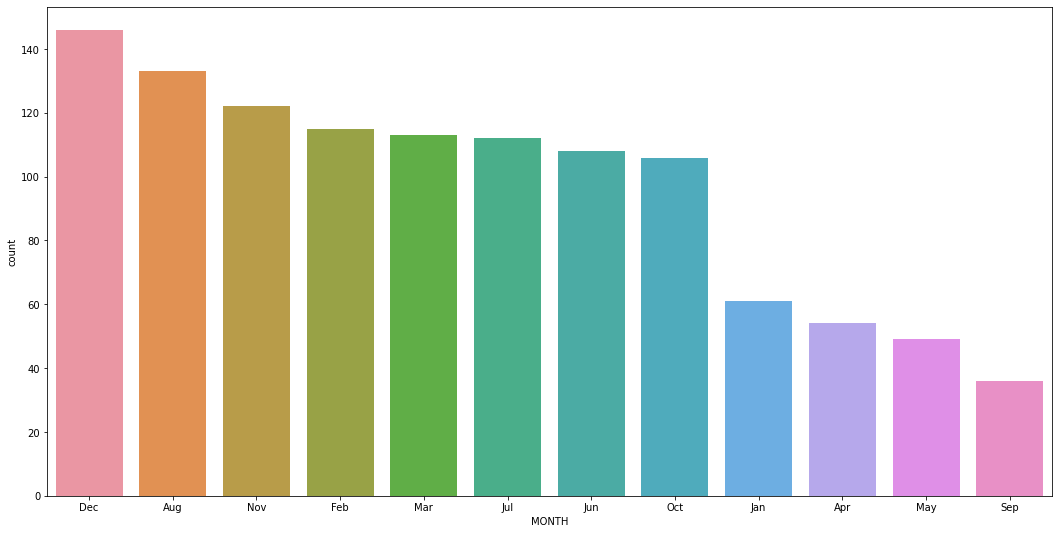

In [79]:
plt.figure(figsize=(18,9))
sns.countplot(data=df,x='MONTH',order=df['MONTH'].value_counts().index)
plt.show()

In December more people are rely on cabs. We may see that during festive season there is a rush of bookings.

In [80]:
df.groupby(['MONTH','ROUND_TRIP']).agg({'MILES':['count']})

MILES
                 count
MONTH ROUND_TRIP      
Apr   False         49
      True           5
Aug   False         86
      True          47
Dec   False         63
      True          83
Feb   False         86
      True          29
Jan   False         44
      True          17
Jul   False        101
      True          11
Jun   False         97
      True          11
Mar   False         99
      True          14
May   False         49
Nov   False         96
      True          26
Oct   False         82
      True          24
Sep   False         15
      True          21

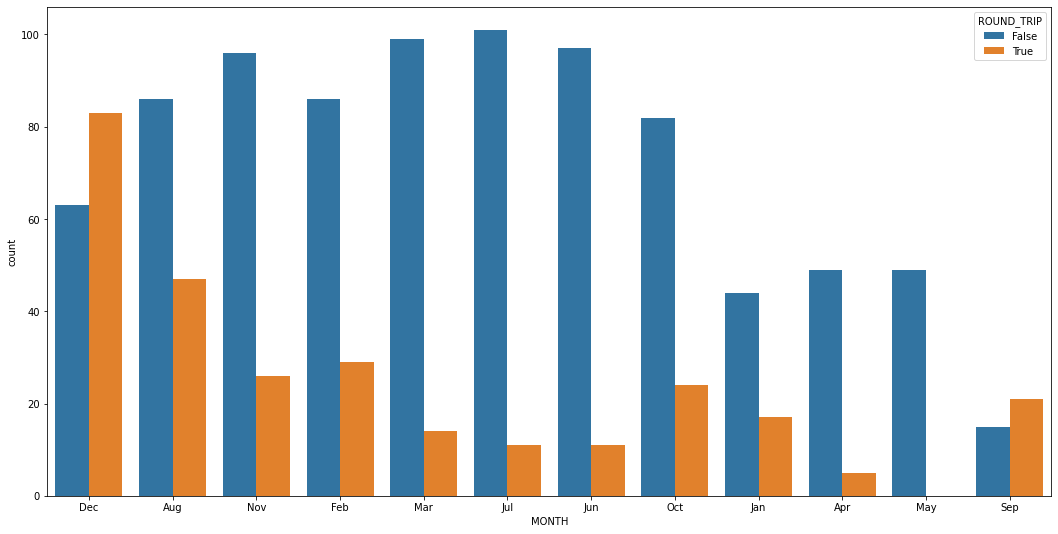

In [81]:
plt.figure(figsize=(18,9))
sns.countplot(data=df,x='MONTH',order=df['MONTH'].value_counts().index,hue='ROUND_TRIP')
plt.show()

We can see December is having more round trips. We may interpret that since December is generally in the holiday season, there most round trips are for buying presents or for picking someone up.

### Purpose and Round trips

In [82]:
purpose=df.groupby(['PURPOSE','ROUND_TRIP']).agg({'ROUND_TRIP':'count'})

In [83]:
purpose.columns=["COUNT"]

In [84]:
purpose.reset_index(inplace=True)

In [85]:
purpose

,PURPOSE,ROUND_TRIP,COUNT
0,Airport/Travel,False,25
1,Airport/Travel,True,29
2,Between Offices,False,16
3,Between Offices,True,2
4,Charity ($),False,1
5,Commute,False,1
6,Customer Visit,False,134
7,Customer Visit,True,21
8,Errand/Supplies,False,106
9,Errand/Supplies,True,67


In [86]:
purpose.sort_values(['COUNT'],ascending=False)

,PURPOSE,ROUND_TRIP,COUNT
12,Meeting,False,246
10,Meal/Entertain,False,204
6,Customer Visit,False,134
15,Temporary Site,False,130
8,Errand/Supplies,False,106
9,Errand/Supplies,True,67
16,Temporary Site,True,66
13,Meeting,True,62
11,Meal/Entertain,True,41
1,Airport/Travel,True,29


We can observe that Most of the round trips are for Supplies. There are a few round trips for Airport/Travel.

In [87]:
df[df['MONTH']=='Dec'].groupby(['PURPOSE','ROUND_TRIP']).agg({'MONTH':'count'}).sort_values(['ROUND_TRIP','MONTH'],ascending = False)

,,MONTH
PURPOSE,ROUND_TRIP,
Errand/Supplies,True,36
Meeting,True,18
Meal/Entertain,True,13
Customer Visit,True,10
Temporary Site,True,3
Airport/Travel,True,2
Between Offices,True,1
Meal/Entertain,False,18
Customer Visit,False,16


Most of the round trips were for Errand/Supplies.

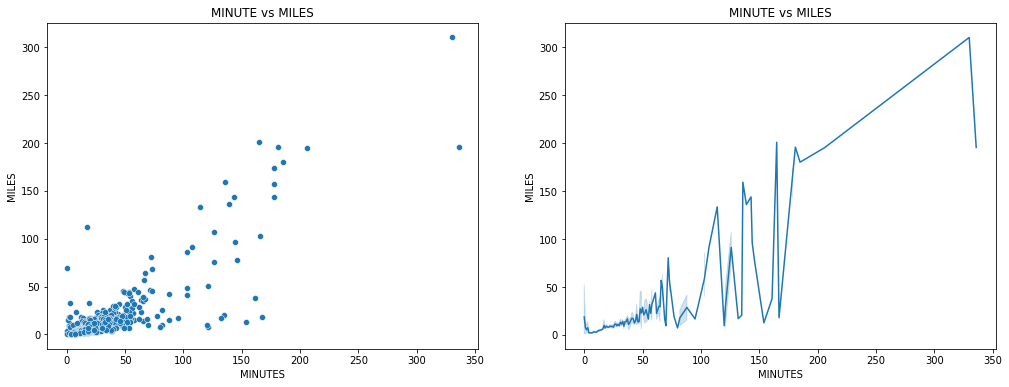

In [88]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
sns.scatterplot(x='MINUTES',y='MILES',data=df)
plt.title('MINUTE vs MILES')

plt.subplot(1,2,2)
sns.lineplot(x='MINUTES',y='MILES',data=df)
plt.title('MINUTE vs MILES')
plt.show()

We expected that there should be linear relation between miles and minutes. But sometimes this pattern is deviated so we can find the reasons for such usual behaviour. Like there may be huge traffic or car brokedown. 

## Category of the ride

In [89]:
category=df.groupby(['CATEGORY','PURPOSE']).agg({'PURPOSE':'count'})
category.columns=['COUNT']
category.reset_index()
category.sort_values(['CATEGORY','COUNT'],inplace=True,ascending = False)

In [90]:
category

COUNT
CATEGORY PURPOSE               
Personal Meal/Entertain      18
         Meeting             17
         Errand/Supplies     14
         Customer Visit      11
         Temporary Site      11
         Moving               4
         Charity ($)          1
         Commute              1
Business Meeting            291
         Meal/Entertain     227
         Temporary Site     185
         Errand/Supplies    159
         Customer Visit     144
         Airport/Travel      54
         Between Offices     18

Lets see the same in graph

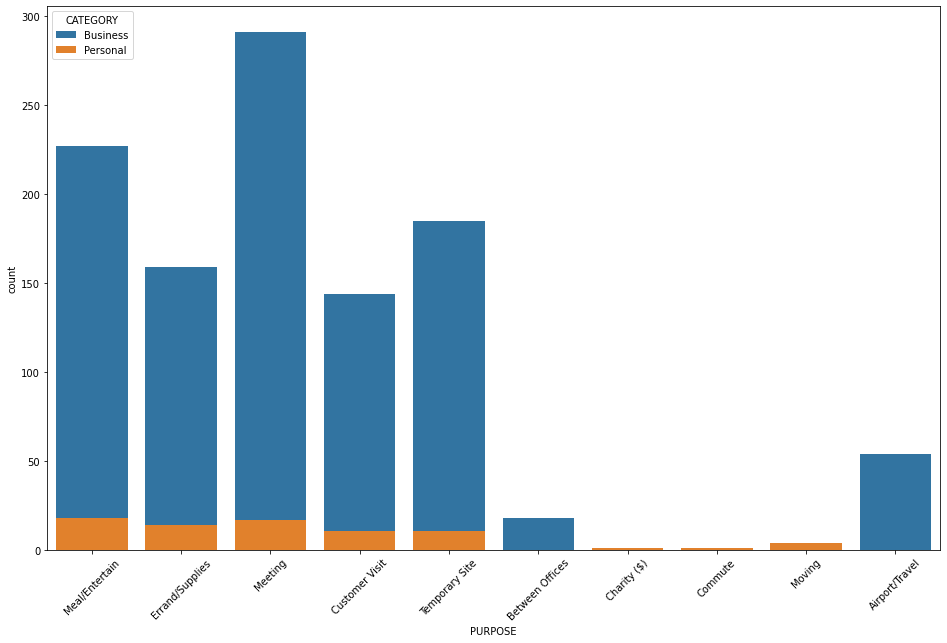

In [92]:
plt.figure(figsize=(16,10))
sns.countplot(x='PURPOSE',data=df,hue='CATEGORY',dodge=False)
plt.xticks(rotation=45)
plt.show()

Obverse that all of the Between office and Airport/Travel trips are of Bussiness category and charity,commute and moving are of Personal category.

In [93]:
df.groupby(['CATEGORY']).agg({'MILES':'mean'})

,MILES
CATEGORY,
Business,10.655844
Personal,9.320779


In [99]:
start_round=df.groupby(['START','ROUND_TRIP']).agg({'START':'count'})

START
START          ROUND_TRIP       
Agnew          False           3
               True            1
Almond         False           1
Apex           False          15
               True            2
...                          ...
Weston         True            2
Westpark Place False          17
Whitebridge    False          61
               True            7
Winston Salem  False           1

[209 rows x 1 columns]

## Conclusions:
1) Majority trips are for bussiness category.
2) Majority round-trips were in December month.
3) Highest overall trips were booked in December.
4) Cary is the most frequent start and stop location.
5) Majority of times purpose of the trip was meeting.
6) For Airport/Travel only bussiness trips were booked.
7) For commute,charity and moving only personal trips were booked.